## Beer Alcohol per Calorie (APC)

I found a nice table of beer alcohol by volume and calories so I thought I'd try something obvious. Maybe alcohol isn't what drinking beer is all about, but it's definitely also about calories. They don't call it a beer belly for nothing. So maybe **APC** should be a thing? If you've ever wondered about how alcohol and calories play together in your favorite brew, you may find the interactive plotly charts at the bottom of this notebook interesting.

In [57]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import lxml
from matplotlib import pyplot
import plotly.express as px

**Thank you homebrewacademy.com for the simple to import table!**

In [59]:
beer = pd.read_html('https://homebrewacademy.com/beer-alcohol-content-list/')

In [60]:
print(f'Total tables: {len(beer)}')

Total tables: 2


In [61]:
# Need the first table, and need to strip off the '%' symbol and make it a float
df = beer[0]
df['ABV'] = df['ABV'].str[:-1]
df['ABV'] = df['ABV'].astype('float')
df.head()

,Brand,Calories,ABV
0,Abita Amber,128,4.5
1,Abita Golden,125,4.2
2,Abita Jockamo IPA,190,6.5
3,Abita Light,118,4.0
4,Abita Purple Haze,128,4.2


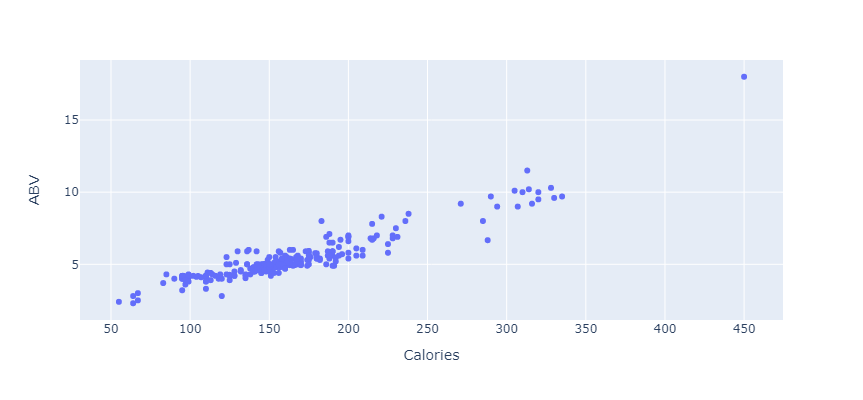

In [62]:
# Start with a simple plotly express plot
fig = px.scatter(df, x="Calories", y="ABV",  hover_data=['Brand'],
                width=400, height=400)
fig.show()

In [63]:
# But the residual isn't really what's important. How about a ratio?
df['apc'] = df['ABV']/df['Calories']
df = df.sort_values(['apc'],ascending=False)

In [64]:
# So which beers give you the most alcohol per calorie?
df.head(10)

,Brand,Calories,ABV,apc
136,Michelob Ultra Pure Gold,85,4.3,0.050588
153,Natural Ice,130,5.9,0.045385
149,Molson Canadian 67,67,3.0,0.044776
33,Bud Ice,123,5.5,0.044715
193,Rolling Rock Green Light,83,3.7,0.044578
52,Corona Premier,90,4.0,0.044444
154,Natural Light,95,4.2,0.044211
133,Michelob Ultra,95,4.2,0.044211
37,Bud Light Platinum,137,6.0,0.043796
142,Miller Lite,96,4.2,0.043750


So it's mostly "light" and "ice" beers winning the "bang for the buck" test but the highest ABV beer is also in the top 30 (truncated for ease of display). Way to go Dogfish Head.

Maybe try something a little fancier...

I like quintiles for graphics because the middle value contains the median and then you get high, low, and extremes.. Quartiles are for boxplots.

In [65]:
pd.qcut(df["apc"], q=5, labels=False)
df['Quintile'] = pd.qcut(df["apc"], q=5, labels=False)
df['Quintile'] = df['Quintile'] + 1  # add one because zero index not helpful here
df.head(10)

,Brand,Calories,ABV,apc,Quintile
136,Michelob Ultra Pure Gold,85,4.3,0.050588,5
153,Natural Ice,130,5.9,0.045385,5
149,Molson Canadian 67,67,3.0,0.044776,5
33,Bud Ice,123,5.5,0.044715,5
193,Rolling Rock Green Light,83,3.7,0.044578,5
52,Corona Premier,90,4.0,0.044444,5
154,Natural Light,95,4.2,0.044211,5
133,Michelob Ultra,95,4.2,0.044211,5
37,Bud Light Platinum,137,6.0,0.043796,5
142,Miller Lite,96,4.2,0.043750,5


Interesting little github bug here that carries over to NBViewer. On the web (and only on the web) the ūndecile column is displaying above (or is it?) even though it isn't added to the dataframe until after this next plot. A little foreshadowing or premonition of things to come! Recalculating the entire notebook in order may have fixed it.

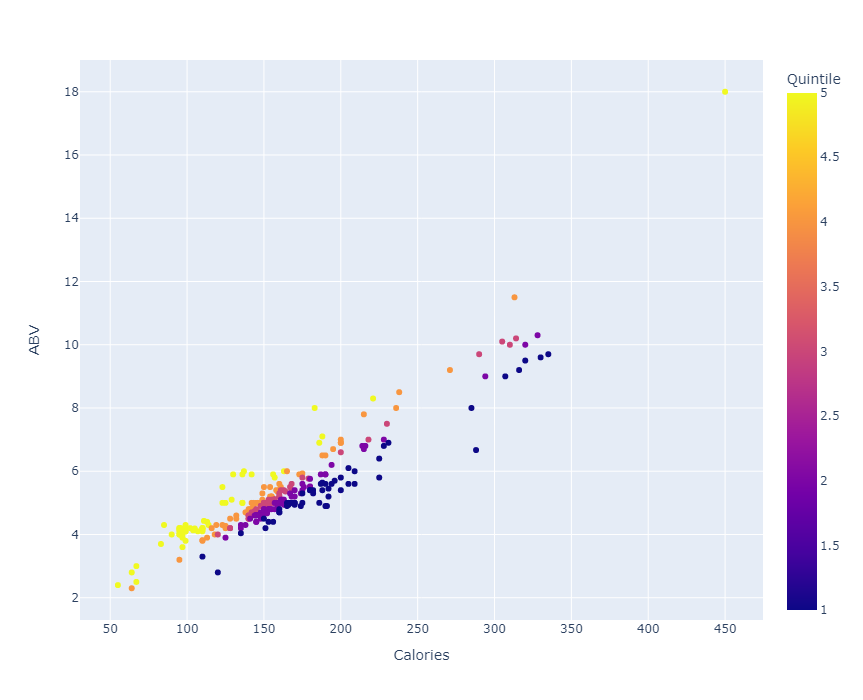

In [66]:
# Now color data points by quintiles of ABV/Calories
fig = px.scatter(df, x="Calories", y="ABV",  hover_data=['Brand'], color="Quintile",
                width=700, height=700)
fig.show()

No surprise that the highest quintile APC are above where the regression line would be but that yellow dot at 18% is interesting. Also, the mass of the ratio distribution is at the lower calorie range. So maybe there is something to light beers after all - just not taste!

Quintiles nicely show the expected pattern so maybe slicing a little finer would be interesting. Deciles plus one maybe... 	ūndeciles? So the median will be in the 6th quantile. Maybe a little wacky, but fun.

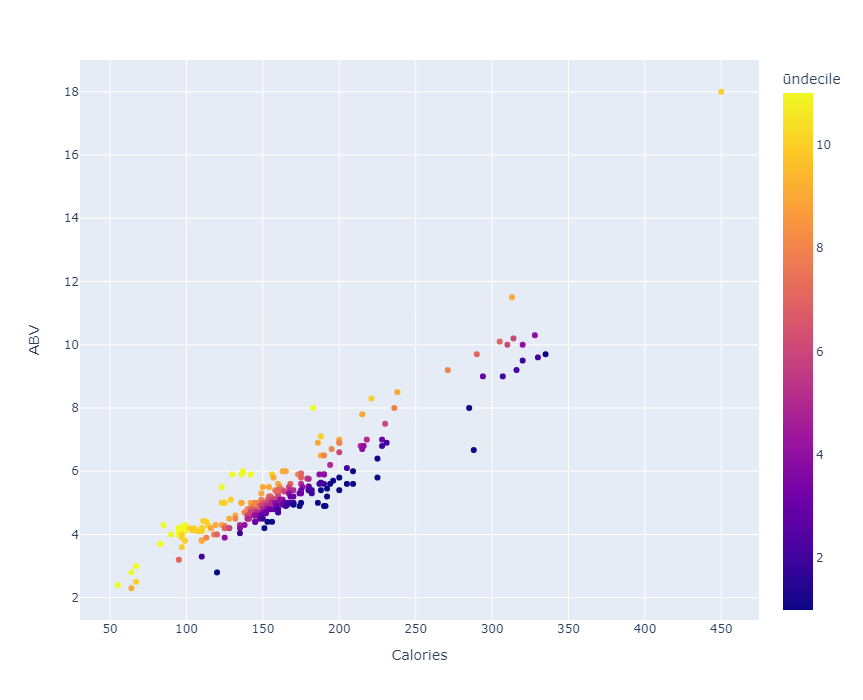

In [68]:
# The same only different.
pd.qcut(df["apc"], q=11, labels=False)
df['ūndecile'] = pd.qcut(df["apc"], q=11, labels=False)
df['ūndecile'] = df['ūndecile'] + 1  # add one because zero index not helpful here

# Now color data points by quintiles of ABV/Calories
fig = px.scatter(df, x="Calories", y="ABV",  hover_data=['Brand'], color="ūndecile",
                width=700, height=700)
fig.show()

Maybe not the best color palette but the plotly zoom functions help distingush the yellows from oranges nicely. Also helpful to remove the clutter between 100 and 200 calories. The highest ABV is in the 10th ūndecile instead of 11.